# Feature Scaling
## Standardization & Normanization
https://www.datacamp.com/tutorial/normalization-vs-standardization

In [32]:
import numpy as np
import pandas as pd
from ucimlrepo import fetch_ucirepo,list_available_datasets
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [33]:
ds = fetch_ucirepo(id=186) 
df=ds.data.features.join(ds.data.targets)
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [34]:
df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


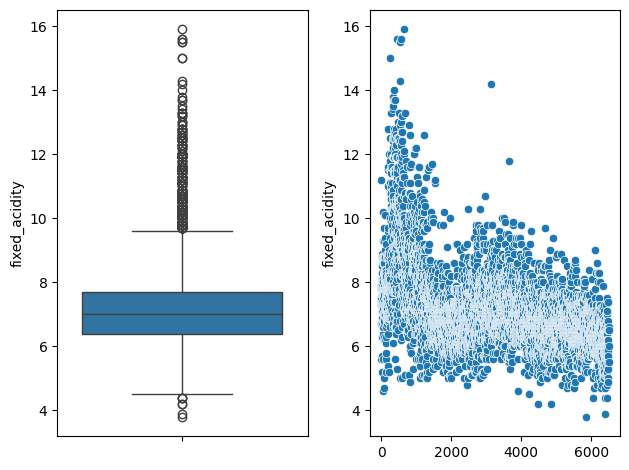

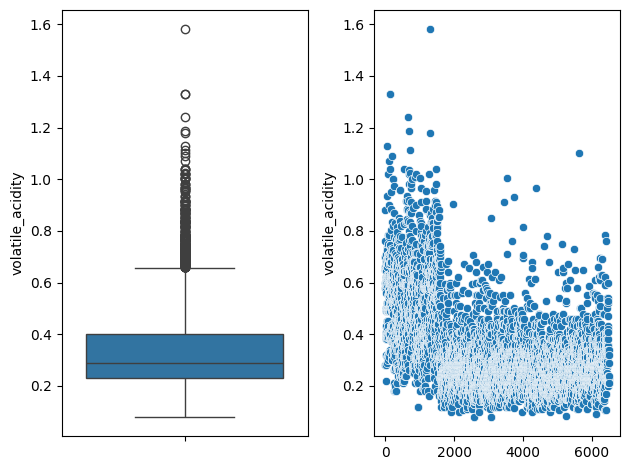

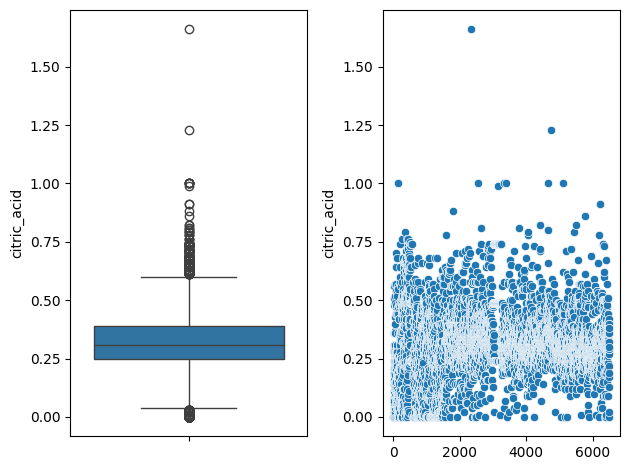

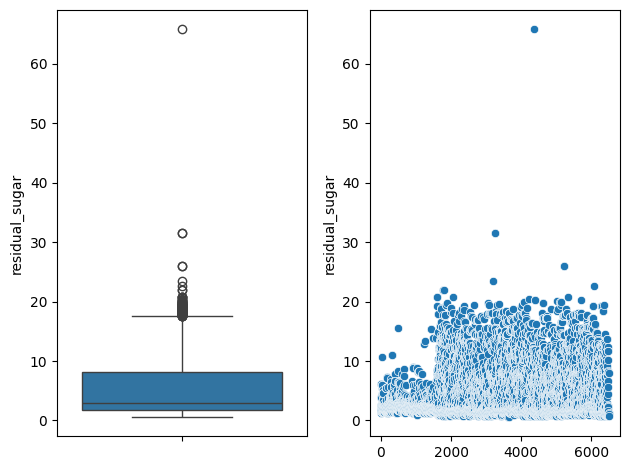

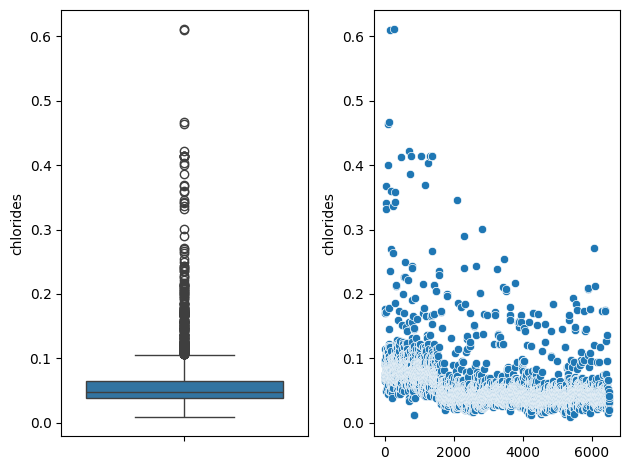

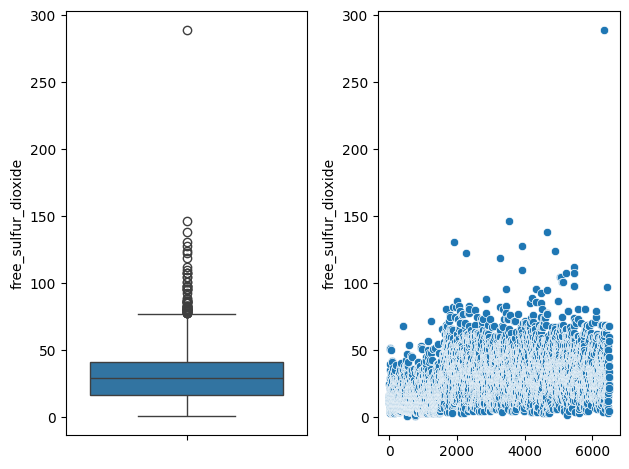

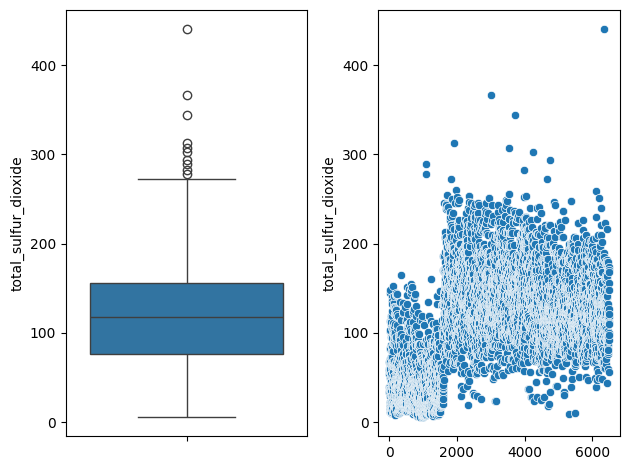

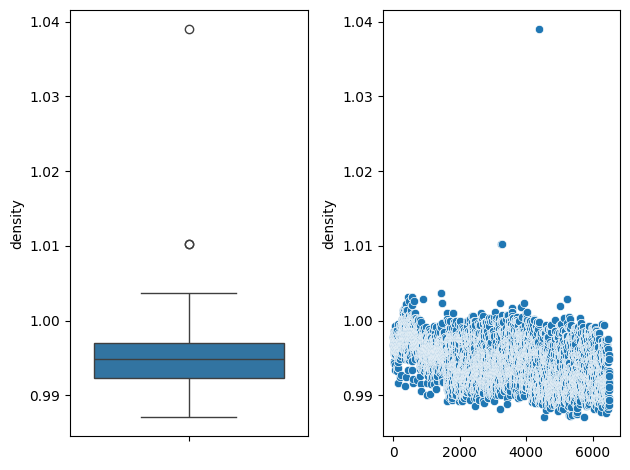

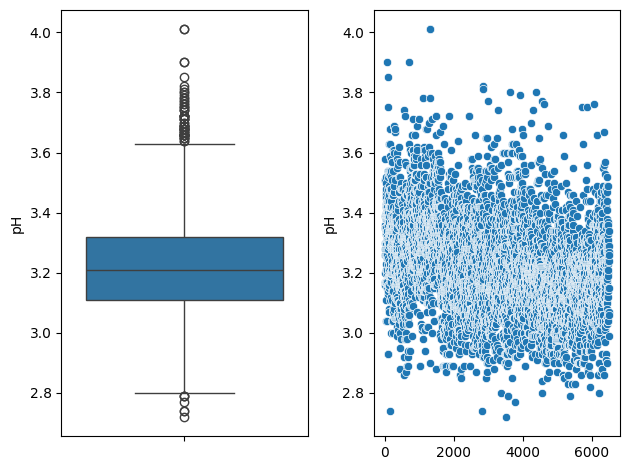

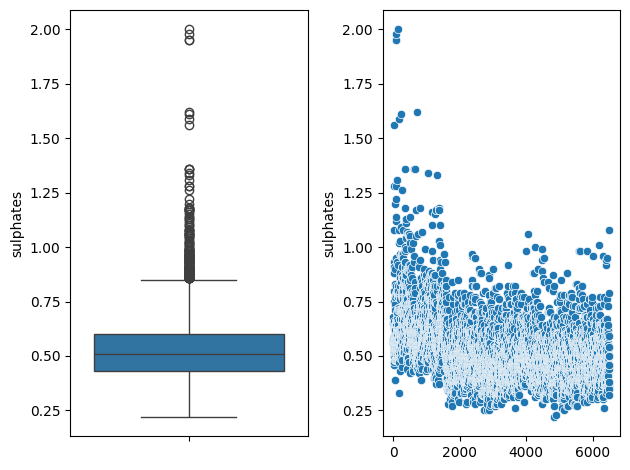

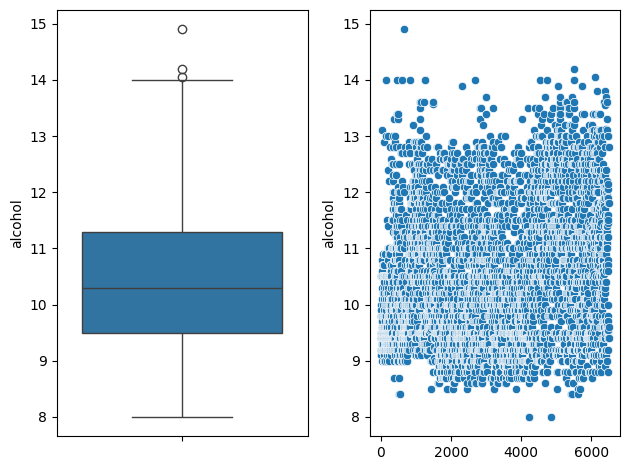

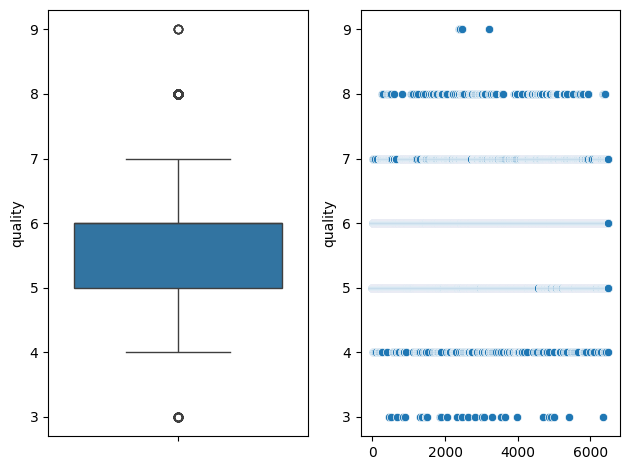

In [52]:

def outlier_plot(data:pd.DataFrame):
    plot_row=1
    plot_index=0
    for key in data.keys():
        plt.subplot(plot_row,2,1) # 1 row, 2 columns, first plot
        sns.boxplot(data[key])
        
        # plt.subplot(plot_row,2,2) # 1 row, 2 columns, first plot
        # sns.violinplot(data[key])
            
        plt.subplot(plot_row,2,2) # 1 row, 2 columns, second plot
        sns.scatterplot(data[key])
        
        plt.tight_layout() # Adjust layout to prevent overlapping titles/labels
        plt.show()
        
    
outlier_plot(df)

In [5]:
from scipy import stats

In [6]:
for key in df.keys():
    df[key],lambda_value=stats.boxcox(df[key])

ValueError: Data must be positive.